# Naive Bayes

### Overview
Following is a walkthrough of the exeuction of Naive Bayes.
We will be using the UCI SMS Spam Collection Dataset for walking through the usage of Naive Bayes. The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
# Load the dataset into a pandas dataframe
# The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
# The dataset is saved as 'SMSSpamCollection' in the directory 'sms+spam+collection/'
df = pd.read_csv('../../Data/sms+spam+collection/SMSSpamCollection', sep='\t', names=['Label', 'Message'])
# Priint the distinct values of the 'Label' column
print("Unique values of Labels" , df['Label'].unique())
# Display the first few rows of the dataset
df.head()


Unique values of Labels ['ham' 'spam']


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### From the sample dataset we notice that the label has value 'ham' and 'spam' only.

#### We will perform EDA to check further about data

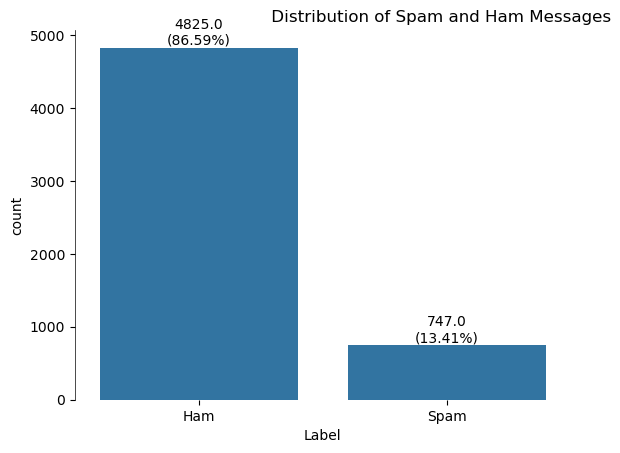

In [11]:

# Exploratory Data Analysis (EDA)
# Plot the distribution of Spam and Ham messages
sns.countplot(x='Label', data=df)
# Add the labels 'Ham' and 'Spam'
plt.gca().set_xticks([0, 1])  # Set the tick positions
plt.gca().set_xticklabels(['Ham', 'Spam'])  # Set the tick labels
# Add title and remove unnecessary borders (spines) for better visualization
plt.title('                                             Distribution of Spam and Ham Messages')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)

# Add count and percentage annotations to each bar
total = len(df) # Total number of messages
for bar in plt.gca().patches: # Iterate through each bar in the plot. There are two plots, Ham and Spam
    count = bar.get_height() # Get the height of the bar, which represents the count of messages
    percentage = f'{100 * count / total:.2f}%' # Calculate the percentage of messages represented by the bar
    plt.gca().annotate(f'{count}\n({percentage})', # Annotate the bar with count and percentage
                       (bar.get_x() + bar.get_width() / 2., count), # Position the annotation at the center of the bar
                       ha='center', va='bottom') # Center the annotation horizontally and align it to the bottom of the bar
plt.show()  # Show the plot


#### From the above plot, we know that 86.5% of data is Ham and 13.5% data is Spam

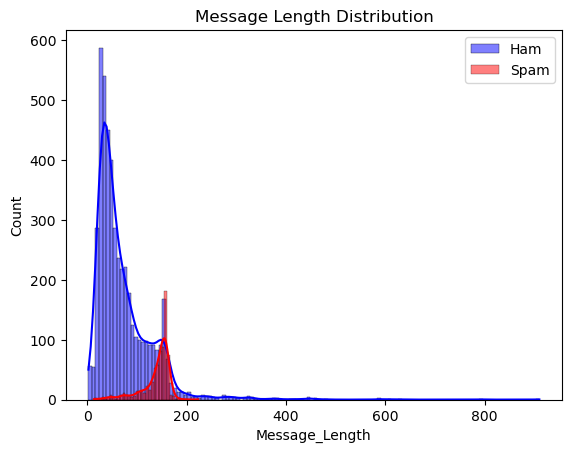

In [12]:
# Check the length of messages
df['Message_Length'] = df['Message'].apply(len)
sns.histplot(df[df['Label'] == 'ham']['Message_Length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['Label'] == 'spam']['Message_Length'], color='red', label='Spam', kde=True)
plt.legend()
plt.title('Message Length Distribution')
plt.show()


#### From the above histogram plot we notice that majority of Ham messages have message lengths between 50 and approx 150 and few messages thinly spread out nearing to 1000
#### The Spam messages have the majority of messages with length of around 170

### Get data ready for modelling

In [13]:
# Data Preprocessing
# Convert labels to binary (ham: 0, spam: 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})
df.head()


,Label,Message,Message_Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Label'], test_size=0.2, random_state=42)

# Convert text data to numerical data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model Training
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test_vec)



In [15]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



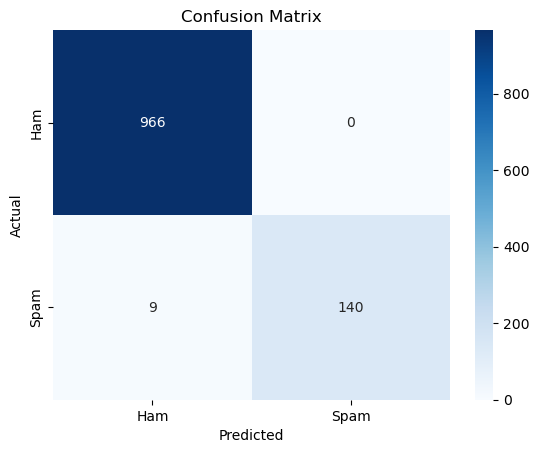

Accuracy: 0.9919


In [16]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

#### The performs of Naive Bayes for this usecase appears to be Awesome. it gives a 99.2% Accuracy and Average F1-Score of 98.
#### Considerinig the simplicity of the algorithm and the effective results it produces, this is a great model to use for classification activity.